In [2]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
y = np.linspace(-10, 10, 100)
y

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [4]:
def softmax(array: np.ndarray, axis=-1) -> np.ndarray:
    array_ = array.copy()
    array_ -= array_.max(axis=axis, keepdims=True)
    array_ = np.exp(array_)
    return array_ / array_.sum(axis=-1, keepdims=True)

In [5]:
y_s = softmax(y)

# temperature

温度系数T主要是用来调整logits-softmax曲线的平滑程度

如果不使用T,或者说T=1,那么softmax不变,loss也不变

随着T的减小,softmax输出各类别之间的概率差距越大(陡峭)

随着T的增大,softmax输出的各类别概率差距会越来越小(平滑)

温度对llm的影响

「温度」是一个大于0的数值，通常在 0 到 1 之间。它影响模型生成文本时采样预测词汇的概率分布。当模型的「温度」较高时（如 0.8、1 或更高），模型会更倾向于从较多样且不同的词汇中选择，这使得生成的文本风险性更高、创意性更强，但也可能产生更多的错误和不连贯之处。而当「温度」较低时（如 0.2、0.3 等），模型主要会从具有较高概率的词汇中选择，从而产生更平稳、更连贯的文本。但此时，生成的文本可能会显得过于保守和重复。

In [6]:
temperature1 = 0.75
y_s1 = softmax(y / temperature1)

In [7]:
temperature2 = 1.25
y_s2 = softmax(y / temperature2)

In [10]:
figure = go.Figure(data=[
    go.Scatter(
        y=y_s,
        name="softmax",
        mode="lines"   # ['lines', 'markers', 'text'] joined with '+' characters
    ),
    go.Scatter(
        y=y_s1,
        name=f"softmax with temperature = {temperature1}",
    ),
    go.Scatter(
        y=y_s2,
        name=f"softmax with temperature = {temperature2}",
    ),
])
figure.show()

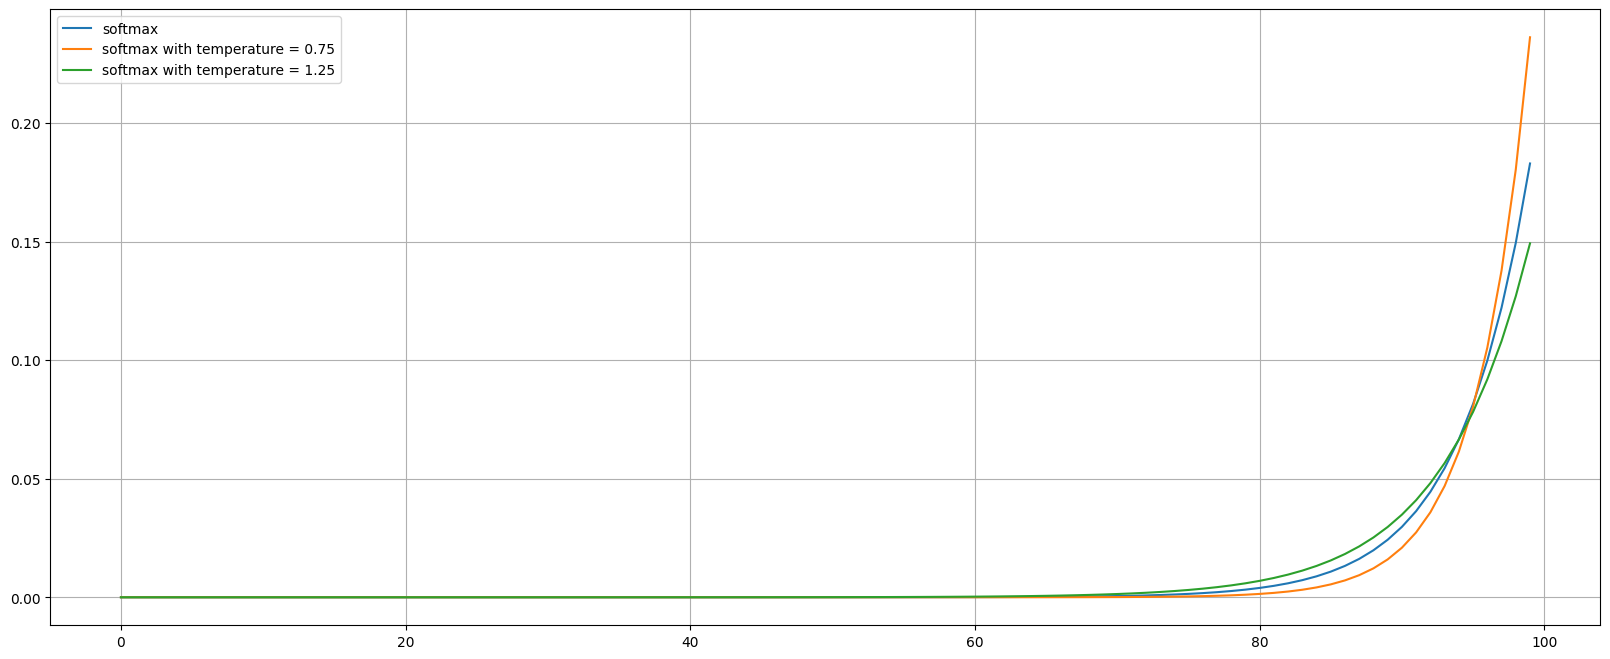

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(y_s, label="softmax")
plt.plot(y_s1, label=f"softmax with temperature = {temperature1}")
plt.plot(y_s2, label=f"softmax with temperature = {temperature2}")
plt.legend()
plt.grid()
plt.show()